# Decision Tree Classifier - Yeast Dataset

In [35]:
# Import libraries
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import joblib

# Import project modules
from src.data_loader import load_processed_data
from src.config import *

print("🌳 Decision Tree Classifier Analysis")
print("=" * 40)

🌳 Decision Tree Classifier Analysis


In [36]:
# Load the processed data
print("1. Loading processed data...")
X_train, X_test, y_train, y_test = load_processed_data()

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Load class names
label_encoder = np.load(MODELS_DIR / 'label_encoder.npy', allow_pickle=True)
class_names = label_encoder
print(f"Class names: {class_names}")

1. Loading processed data...
Training data shape: (1038, 8)
Test data shape: (446, 8)
Number of classes: 10
Class names: ['CYT' 'ERL' 'EXC' 'ME1' 'ME2' 'ME3' 'MIT' 'NUC' 'POX' 'VAC']


In [37]:
# Load the trained Decision Tree model
print("2. Loading trained Decision Tree model...")
model = joblib.load(MODELS_DIR / 'decision_tree.pkl')

print(f"Model type: {type(model)}")
print(f"Max depth: {model.max_depth}")
print(f"Min samples split: {model.min_samples_split}")
print(f"Criterion: {model.criterion}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print(f"Predictions shape: {y_pred.shape}")
print(f"Prediction probabilities shape: {y_pred_proba.shape}")

2. Loading trained Decision Tree model...
Model type: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Max depth: 5
Min samples split: 2
Criterion: gini
Predictions shape: (446,)
Prediction probabilities shape: (446, 10)


/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [38]:
# Model Performance Analysis
print("3. Model Performance Analysis")
print("=" * 30)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

3. Model Performance Analysis
Accuracy: 0.5605
Precision: 0.5501
Recall: 0.5605
F1-Score: 0.5412

Detailed Classification Report:
              precision    recall  f1-score   support

         CYT       0.47      0.67      0.56       139
         ERL       0.00      0.00      0.00         2
         EXC       0.50      0.09      0.15        11
         ME1       0.57      0.92      0.71        13
         ME2       0.38      0.33      0.36        15
         ME3       0.77      0.88      0.82        49
         MIT       0.67      0.49      0.57        73
         NUC       0.58      0.47      0.52       129
         POX       0.00      0.00      0.00         6
         VAC       0.00      0.00      0.00         9

    accuracy                           0.56       446
   macro avg       0.39      0.39      0.37       446
weighted avg       0.55      0.56      0.54       446



/opt/homebrew/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.13

4. Confusion Matrix


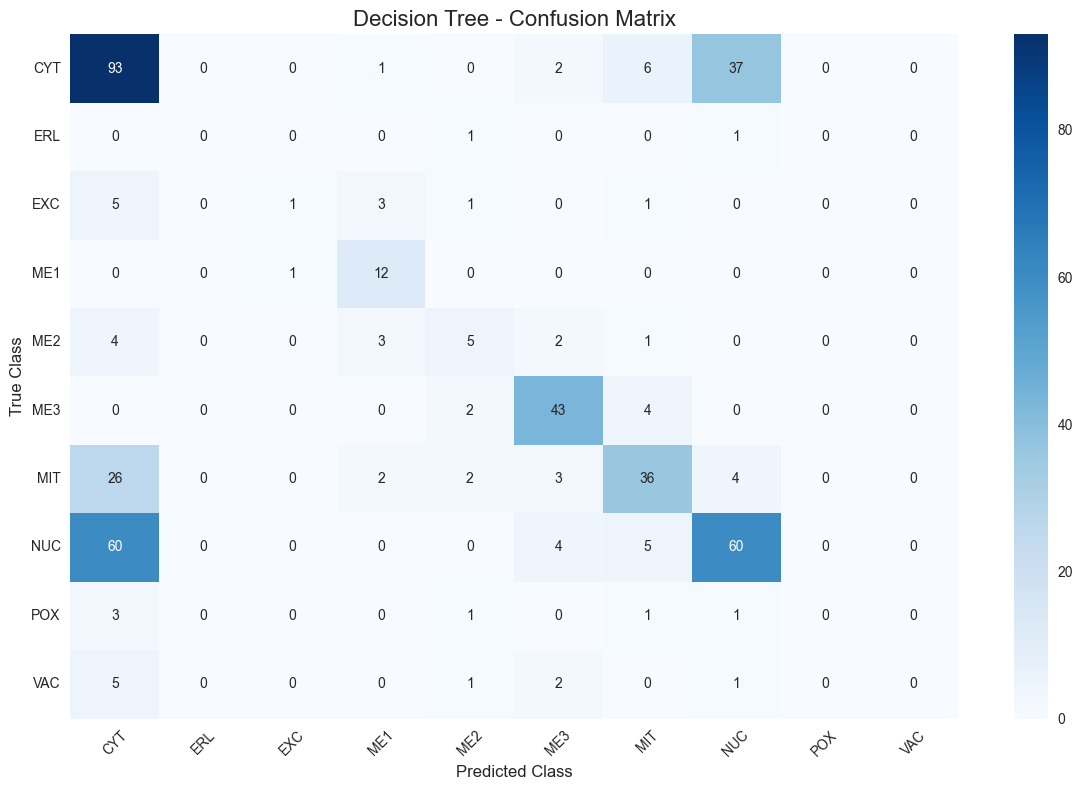


Per-class Accuracy:
CYT: 0.669
ERL: 0.000
EXC: 0.091
ME1: 0.923
ME2: 0.333
ME3: 0.878
MIT: 0.493
NUC: 0.465
POX: 0.000
VAC: 0.000


In [39]:
# Confusion Matrix Visualization
print("4. Confusion Matrix")
print("=" * 20)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Decision Tree - Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\nPer-class Accuracy:")
for i, (class_name, acc) in enumerate(zip(class_names, class_accuracy)):
    print(f"{class_name}: {acc:.3f}")

5. Feature Importance Analysis


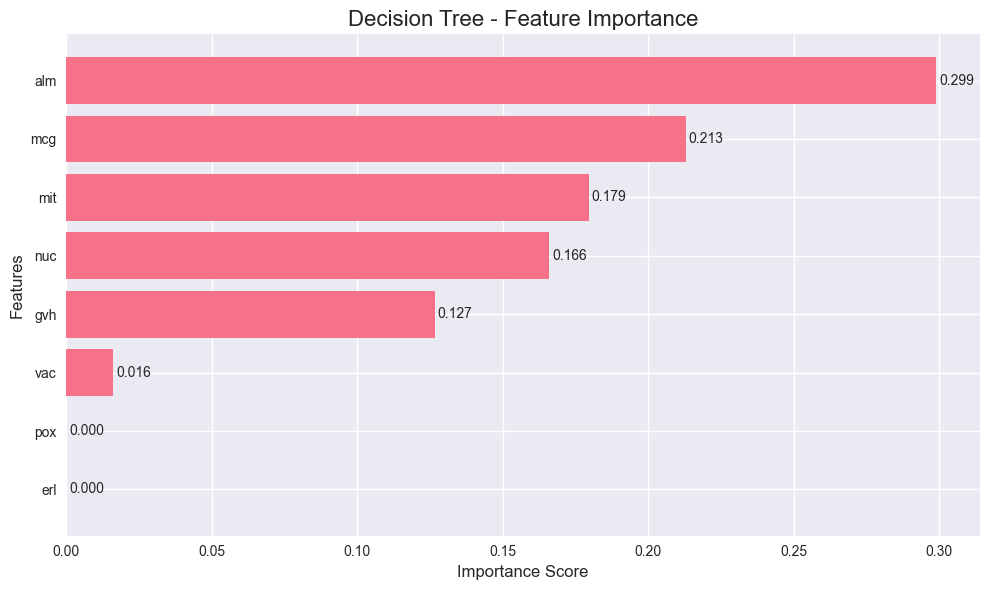


Feature Importance (sorted):
erl: 0.0000
pox: 0.0000
vac: 0.0162
gvh: 0.1267
nuc: 0.1659
mit: 0.1795
mcg: 0.2129
alm: 0.2989


In [40]:
# Feature Importance Analysis
print("5. Feature Importance Analysis")
print("=" * 30)

# Get feature importance
feature_importance = model.feature_importances_
feature_names = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']

# Create feature importance DataFrame
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['feature'], importance_df['importance'])
plt.title('Decision Tree - Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()

print("\nFeature Importance (sorted):")
for _, row in importance_df.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

6. Decision Tree Structure


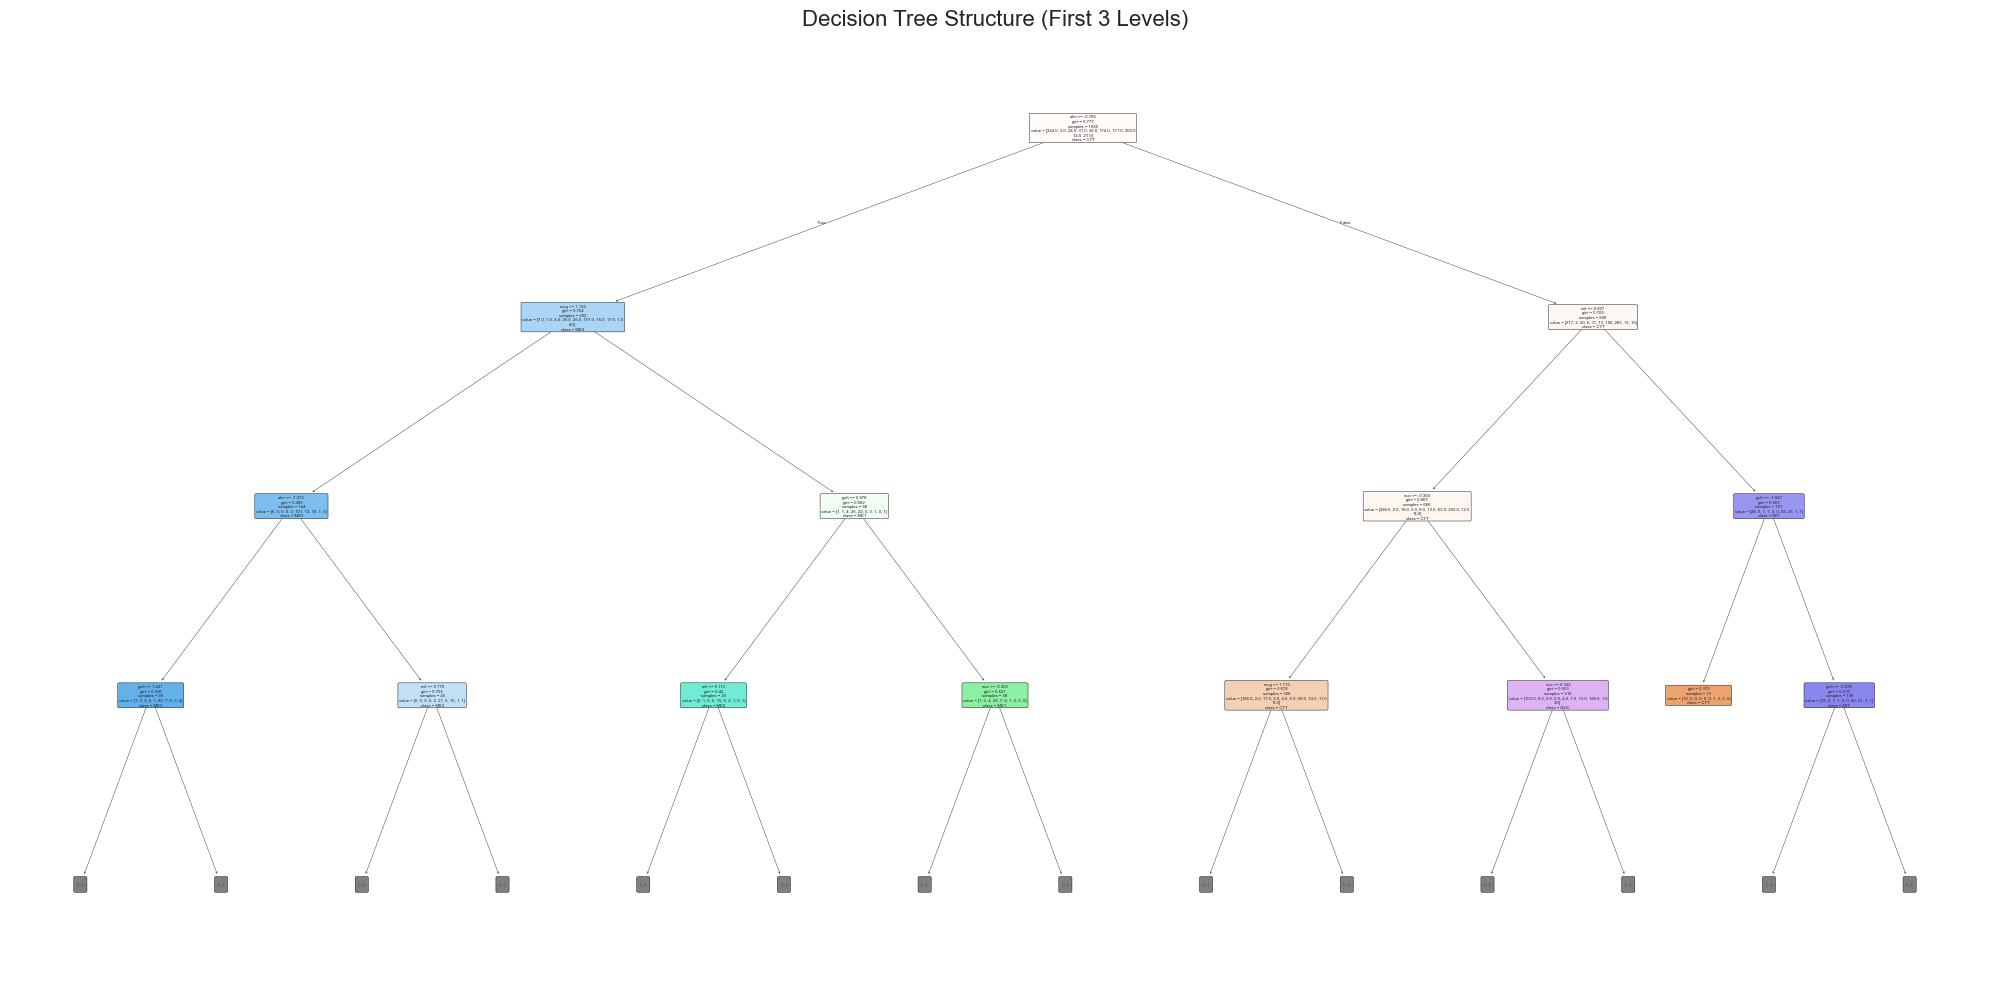

Tree depth: 5
Number of leaves: 24
Number of nodes: 47


In [41]:
# Decision Tree Visualization (first few levels)
print("6. Decision Tree Structure")
print("=" * 30)

# Plot the decision tree (first 3 levels for readability)
plt.figure(figsize=(20, 10))
plot_tree(model, max_depth=3, feature_names=feature_names, 
          class_names=class_names, filled=True, rounded=True)
plt.title('Decision Tree Structure (First 3 Levels)', fontsize=16)
plt.tight_layout()
plt.show()

print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")
print(f"Number of nodes: {model.tree_.node_count}")

7. Learning Curves Analysis


/opt/homebrew/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


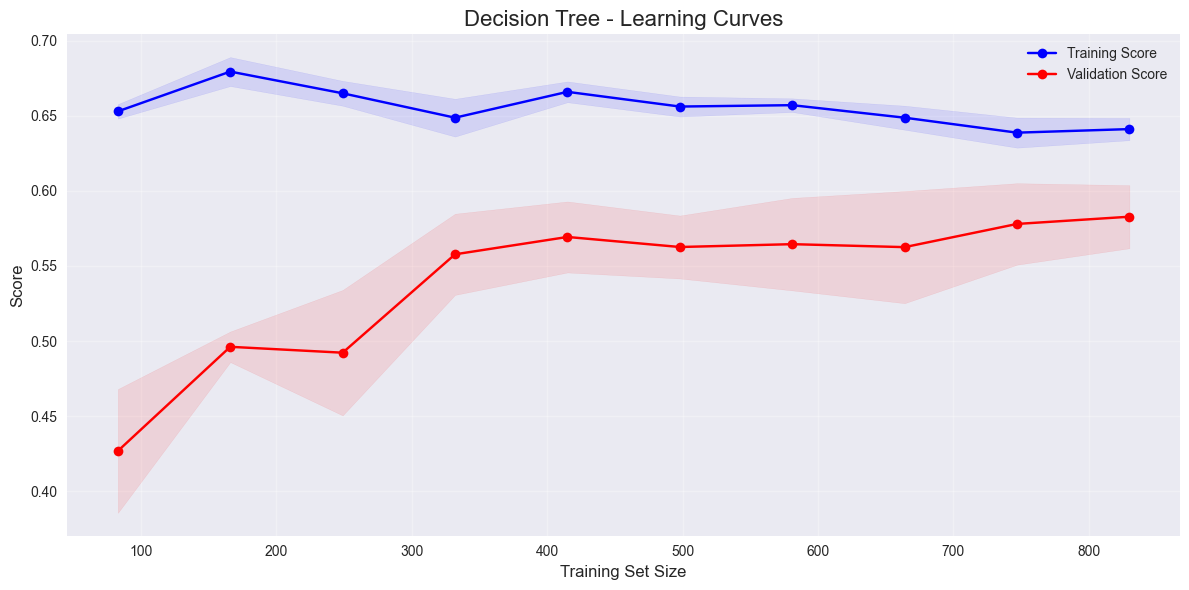

Final training score: 0.6412 ± 0.0074
Final validation score: 0.5828 ± 0.0210


In [42]:
# Learning Curves
print("7. Learning Curves Analysis")
print("=" * 30)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Score', color='red')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

plt.title('Decision Tree - Learning Curves', fontsize=16)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training score: {train_mean[-1]:.4f} ± {train_std[-1]:.4f}")
print(f"Final validation score: {val_mean[-1]:.4f} ± {val_std[-1]:.4f}")